In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 1.0e-4
for g in gamma:
    print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          early_stop=3,
                          gamma=g)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search bert-base-uncased, lr: 0.0001 ,focal loss, gamma: 2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.3152	Val Loss:	0.5749	Accuracy:	0.7571	F1:	0.7170
2 / 10: Train Loss:	0.2121	Val Loss:	0.4333	Accuracy:	0.8337	F1:	0.7817
3 / 10: Train Loss:	0.1305	Val Loss:	0.4109	Accuracy:	0.8315	F1:	0.7906
4 / 10: Train Loss:	0.0795	Val Loss:	0.3753	Accuracy:	0.8534	F1:	0.7963
5 / 10: Train Loss:	0.0816	Val Loss:	0.6226	Accuracy:	0.6127	F1:	0.6054
6 / 10: Train Loss:	0.0805	Val Loss:	0.4723	Accuracy:	0.7702	F1:	0.7425
7 / 10: Train Loss:	0.0535	Val Loss:	0.3987	Accuracy:	0.8337	F1:	0.7475
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.80      0.48      0.60       119
      struct       0.84      0.96      0.90       338

    accuracy                           0.83       457
   macro avg       0.82      0.72      0.75       457
weighted avg       0.83      0.83      0.82       457

test results:
              precision    recall  f1-score   support

       bknow

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.0856	Val Loss:	0.6072	Accuracy:	0.7746	F1:	0.7238
2 / 10: Train Loss:	0.0781	Val Loss:	0.5450	Accuracy:	0.8271	F1:	0.7516
3 / 10: Train Loss:	0.0521	Val Loss:	0.5129	Accuracy:	0.8512	F1:	0.8001
4 / 10: Train Loss:	0.0323	Val Loss:	0.6424	Accuracy:	0.6411	F1:	0.6323
5 / 10: Train Loss:	0.0230	Val Loss:	0.7375	Accuracy:	0.6236	F1:	0.6173
6 / 10: Train Loss:	0.0185	Val Loss:	0.4342	Accuracy:	0.8096	F1:	0.7656
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.61      0.72      0.66       119
      struct       0.90      0.84      0.87       338

    accuracy                           0.81       457
   macro avg       0.76      0.78      0.77       457
weighted avg       0.82      0.81      0.81       457

test results:
              precision    recall  f1-score   support

       bknow       0.62      0.75      0.68        67
      struct       0.90      0

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.0060	Val Loss:	0.6436	Accuracy:	0.7790	F1:	0.7240
2 / 10: Train Loss:	0.0038	Val Loss:	0.6296	Accuracy:	0.7702	F1:	0.7390
3 / 10: Train Loss:	0.0034	Val Loss:	0.4770	Accuracy:	0.8359	F1:	0.7625
4 / 10: Train Loss:	0.0050	Val Loss:	0.6429	Accuracy:	0.7396	F1:	0.4252
5 / 10: Train Loss:	0.0028	Val Loss:	0.4871	Accuracy:	0.8446	F1:	0.7613
6 / 10: Train Loss:	0.0012	Val Loss:	0.5453	Accuracy:	0.7768	F1:	0.7452
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.55      0.82      0.66       119
      struct       0.92      0.76      0.83       338

    accuracy                           0.78       457
   macro avg       0.73      0.79      0.75       457
weighted avg       0.82      0.78      0.79       457

test results:
              precision    recall  f1-score   support

       bknow       0.52      0.81      0.64        67
      struct       0.92      0

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.0000	Val Loss:	0.6792	Accuracy:	0.6871	F1:	0.6622
2 / 10: Train Loss:	0.0000	Val Loss:	0.6638	Accuracy:	0.7965	F1:	0.7611
3 / 10: Train Loss:	0.0000	Val Loss:	0.6616	Accuracy:	0.6543	F1:	0.6442
4 / 10: Train Loss:	0.0000	Val Loss:	0.6447	Accuracy:	0.8053	F1:	0.7713
5 / 10: Train Loss:	0.0000	Val Loss:	0.6924	Accuracy:	0.4945	F1:	0.4944
6 / 10: Train Loss:	0.0000	Val Loss:	0.6675	Accuracy:	0.6674	F1:	0.6549
7 / 10: Train Loss:	0.0000	Val Loss:	0.6050	Accuracy:	0.8206	F1:	0.7720
8 / 10: Train Loss:	0.0000	Val Loss:	0.6137	Accuracy:	0.7746	F1:	0.7431
9 / 10: Train Loss:	0.0000	Val Loss:	0.5663	Accuracy:	0.8293	F1:	0.7808
10 / 10: Train Loss:	0.0000	Val Loss:	0.6287	Accuracy:	0.6740	F1:	0.6596
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.44      0.90      0.59       119
      struct       0.94      0.59      0.73       338

    accuracy                           0.67       457
   macro avg      

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

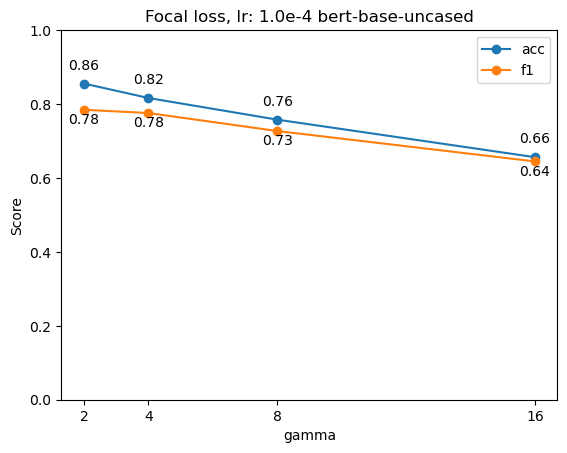

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='g', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["g"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["g"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['g'], [val for val in df['g']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, lr: 1.0e-4 {model_checkpoint}')